# 1) Get texts and create lang-text dictionary

In [2]:
import requests
import os
import pickle
import time
import math


In [57]:
def check_dirs(directories):

    for directory in directories:
        if os.path.exists('./'+directory):
            print(f"The directory '{'./'+directory}' exists.")
        else:
            os.makedirs(directory)
            print(f"The directory '{'./'+directory}' does not exist.")

def merge_sentences_pickle(sentences, pickle_file=None):
    merged_text = ' '.join(sentences)
    if pickle_file:
        with open(pickle_file, 'wb') as file:
            pickle.dump(merged_text, file)
        print(f"Merged text pickled to: {pickle_file}")

        file_size = os.path.getsize(pickle_file)
        print(f"Size of the pickled file: {file_size / (1024 * 1024)} MB with {len(sentences)} sentences!")

    return merged_text

def download_treebank(url, output_path):
    response = requests.get(url)
    with open(output_path, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded treebank to {output_path}")

def extract_sentences(conllu_file, print_info=False):
    sentences = []
    with open(conllu_file, 'r', encoding='utf-8') as file:
        sentence = []
        for line in file:
            line = line.strip()
            if not line:
                if sentence:
                    sentences.append(' '.join(sentence))
                    sentence = []
            elif not line.startswith('#'):
                parts = line.split('\t')
                if len(parts) > 1:
                    sentence.append(parts[1])
        if sentence:
            sentences.append(' '.join(sentence))
        
    
    if print_info == True:
        print(f"Number of sentences: {len(sentences)}")
    return sentences


In [61]:
req_directories = ["texts/train/", "texts/test/", "texts_pickles/train/", "texts_pickles/test/"]
check_dirs(req_directories)

The directory './texts/train/' exists.
The directory './texts/test/' exists.
The directory './texts_pickles/train/' exists.
The directory './texts_pickles/test/' exists.


In [59]:
treebank_train_urls = [
    "https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Turkish-Kenet/master/tr_kenet-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Dutch-Alpino/master/nl_alpino-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Czech-FicTree/master/cs_fictree-ud-train.conllu",
    # "https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-Talbanken/master/sv_talbanken-ud-train.conllu",
    # "https://raw.githubusercontent.com/UniversalDependencies/UD_Romanian-RRT/master/ro_rrt-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-GSD/master/es_gsd-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Finnish-TDT/master/fi_tdt-ud-train.conllu",
    # "https://raw.githubusercontent.com/UniversalDependencies/UD_Croatian-SET/master/hr_set-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Slovenian-SSJ/master/sl_ssj-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Polish-LFG/master/pl_lfg-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Portuguese-GSD/master/pt_gsd-ud-train.conllu"
]


treebank_train_info = {}

for url_tree in treebank_train_urls:
    file_name = url_tree.split('/')[-1]
    output_file = "texts/train/"+  file_name
    pickle_file = "texts_pickles/train/" + file_name.replace(".conllu", ".pkl")

    download_treebank(url_tree, output_file)
    sentences = extract_sentences(output_file, print_info=True)
    merge_sentences_pickle(sentences, pickle_file=pickle_file)

    treebank_train_info[file_name.split(".")[0]] = len(sentences)
    
    for i, sentence in enumerate(sentences[:3]): 
        print(f"Sentence {i+1}: {sentence}")
    print("-"*20+"\n")

Downloaded treebank to texts/train/en_ewt-ud-train.conllu
Number of sentences: 12544
Merged text pickled to: texts_pickles/train/en_ewt-ud-train.pkl
Size of the pickled file: 1.00433349609375 MB with 12544 sentences!
Sentence 1: Al - Zaman : American forces killed Shaikh Abdullah al - Ani , the preacher at the mosque in the town of Qaim , near the Syrian border .
Sentence 2: [ This killing of a respected cleric will be causing us trouble for years to come . ]
Sentence 3: DPA : Iraqi authorities announced that they had busted up 3 terrorist cells operating in Baghdad .
--------------------

Downloaded treebank to texts/train/tr_kenet-ud-train.conllu
Number of sentences: 15398
Merged text pickled to: texts_pickles/train/tr_kenet-ud-train.pkl
Size of the pickled file: 0.966766357421875 MB with 15398 sentences!
Sentence 1: Üstünde lacivert abajurlu , parlak bir madenden lamba .
Sentence 2: Bursa abanisi .
Sentence 3: Efendi , sen de ne üstüme abanıyorsun ?
--------------------

Downloaded 

In [60]:
treebank_train_info

{'en_ewt-ud-train': 12544,
 'tr_kenet-ud-train': 15398,
 'nl_alpino-ud-train': 12289,
 'cs_fictree-ud-train': 10160,
 'es_gsd-ud-train': 14187,
 'fi_tdt-ud-train': 12217,
 'sl_ssj-ud-train': 10903,
 'pl_lfg-ud-train': 13774,
 'de_gsd-ud-train': 13814,
 'pt_gsd-ud-train': 9616}

In [46]:
treebank_test_urls = [
    "https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Turkish-Kenet/master/tr_kenet-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Dutch-Alpino/master/nl_alpino-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Czech-FicTree/master/cs_fictree-ud-test.conllu",
    # "https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-Talbanken/master/sv_talbanken-ud-test.conllu",
    # "https://raw.githubusercontent.com/UniversalDependencies/UD_Romanian-RRT/master/ro_rrt-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-GSD/master/es_gsd-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Finnish-TDT/master/fi_tdt-ud-test.conllu",
    # "https://raw.githubusercontent.com/UniversalDependencies/UD_Croatian-SET/master/hr_set-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Slovenian-SSJ/master/sl_ssj-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Polish-LFG/master/pl_lfg-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-test.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Portuguese-GSD/master/pt_gsd-ud-test.conllu"
]


treebank_test_info = {}

for url_tree in treebank_test_urls:
    file_name = url_tree.split('/')[-1]
    output_file = "texts/test/"+  file_name
    pickle_file = "texts_pickles/test/" + file_name.replace(".conllu", ".pkl")

    download_treebank(url_tree, output_file)

    sentences = extract_sentences(output_file, print_info=True)
    print(type(sentences))
    with open(pickle_file, 'wb') as file:
        pickle.dump(sentences, file)
        print(f"Sentences pickled to: {pickle_file}")


    treebank_test_info[file_name.split(".")[0]] = len(sentences)
    
    for i, sentence in enumerate(sentences[:3]): 
        print(f"Sentence {i+1}: {sentence}")
    print("-"*20+"\n")

Downloaded treebank to texts/test/en_ewt-ud-test.conllu
Number of sentences: 2077
<class 'list'>
Sentences pickled to: texts_pickles/test/en_ewt-ud-test.pkl
Sentence 1: What if Google Morphed Into GoogleOS ?
Sentence 2: What if Google expanded on its search - engine ( and now e-mail ) wares into a full - fledged operating system ?
Sentence 3: [ via Microsoft Watch from Mary Jo Foley ]
--------------------

Downloaded treebank to texts/test/tr_kenet-ud-test.conllu
Number of sentences: 1643
<class 'list'>
Sentences pickled to: texts_pickles/test/tr_kenet-ud-test.pkl
Sentence 1: Cezveyi sürüyor , fincana boşaltıyor , kahveyi afiyetle içiyordu .
Sentence 2: Kırmızı daha ağır basıyor .
Sentence 3: Devlet adamlarının ileri gelenleri böyle sözlere karışmaz , ağır dururlar .
--------------------

Downloaded treebank to texts/test/nl_alpino-ud-test.conllu
Number of sentences: 596
<class 'list'>
Sentences pickled to: texts_pickles/test/nl_alpino-ud-test.pkl
Sentence 1: GENUA - Kloosterorden en c

In [47]:
treebank_test_info

{'en_ewt-ud-test': 2077,
 'tr_kenet-ud-test': 1643,
 'nl_alpino-ud-test': 596,
 'cs_fictree-ud-test': 1291,
 'es_gsd-ud-test': 426,
 'fi_tdt-ud-test': 1555,
 'sl_ssj-ud-test': 1282,
 'pl_lfg-ud-test': 1727,
 'de_gsd-ud-test': 977,
 'pt_gsd-ud-test': 1200}

# 2) Load pickled text files

In [3]:
dict_texts_train = {}

for pickle_name in os.listdir("texts_pickles/train/"):

    lang = pickle_name.split("_")[0]
    pickle_path = "texts_pickles/train/" + pickle_name

    with open(pickle_path, 'rb') as file:
        dict_texts_train[lang] = pickle.load(file)

print(list(dict_texts_train.keys()))

['cs', 'de', 'en', 'es', 'fi', 'nl', 'pl', 'pt', 'sl', 'tr']


In [4]:
dict_texts_train["es"][:500]

'Además se le pediría a las empresas interesadas en prestar el servicio que se hagan cargo de la señalización y la cartelería que contiene información para los usuarios . Producto del de el fin del de el imperio y las invasiones germanas la población isleña cayó a 1 millón durante el período sajón , permaneciendo hasta el siglo XI cuando volvió a aumentar llegando a 5 a 7 millones en el siglo XV , pero tras la peste negra volvió a reducirse reducir se a solo 2 a 4 millones . MADRID , 3 ( EUROPA P'

In [5]:
dict_texts_test = {}

for pickle_name in os.listdir("texts_pickles/test/"):

    lang = pickle_name.split("_")[0]
    pickle_path = "texts_pickles/test/" + pickle_name

    with open(pickle_path, 'rb') as file:
        dict_texts_test[lang] = pickle.load(file)

print(list(dict_texts_test.keys()))

['cs', 'de', 'en', 'es', 'fi', 'nl', 'pl', 'pt', 'sl', 'tr']


In [6]:
dict_texts_test["es"][:5]

['De allí procedía la familia del de el escritor vallisoletano Blas Pajarero , cuya casa se encuentra en la Plaza de San Pedro ;',
 'La Provincia de Mamoré es una provincia del de el departamento del de el Beni en Bolivia .',
 'Con la llegada de maquinaria ( martillos hidráulicos y compresores ) , la perforación manual dejó de ser necesaria en las canteras y minas .',
 'Su actuación recibió buenas reseñas , al a el igual que el filme .',
 'Aunque se solía sobreentender que Van Vliet fue aprendiz de Rembrandt , en realidad era un colaborador ya formado , que produjo planchas copiando pinturas de Rembrandt y que llegó a intervenir a dúo con él en otras .']

# 3) Language Detection and Models

In [7]:
def tokenize(text, n):
    return [text[i:i+n] for i in range(len(text)-n+1)]

def create_token_freq_table(text, n):

    # 1) create tokens for given text
    tokens = tokenize(text, n)
    # print(tokens[:500])

    # 2) create character frequency table
    token_freqs = {char: 0 for char in set(tokens)}
    # print(len(token_freqs))
    # print(token_freqs)


    total_tokens = 0
    # 3) set character frequencies and normalize them
    for token in tokens:
        if token in token_freqs:
            token_freqs[token] += 1
            total_tokens += 1

    for token in token_freqs:
        token_freqs[token] /= total_tokens  # normalize frequencies
    
    return token_freqs

def detect_lang_distances(text, lang_token_freqs, n):
    lang_dists = {}
    for lang, lang_token_freq in lang_token_freqs.items():
        # 1) create tokens and token-freq table for given text
        tokens = tokenize(text, n)
        text_token_freq = create_token_freq_table(text, n)

        # 2) compare distances of tokens of the text with other languages' tokens
        distance = 0.0
        for tok in tokens:
            text_token = text_token_freq.get(tok, 0)
            lang_token = lang_token_freq.get(tok, 0)
            distance +=  (text_token - lang_token) ** 2

        lang_dists[lang] = distance

    closest_lang = min(lang_dists, key=lang_dists.get)  
    return closest_lang, lang_dists




def detect_lang_likelihood(text, lang_token_freqs, n, penalizer_val=1e-5):
    lang_scores = {}
    for lang, lang_token_freq in lang_token_freqs.items():

        # 1) create tokens for given text
        tokens = tokenize(text, n)

        # 2) calculate likelihood of languages with the given text
        lang_score = 0
        for token in tokens:
            if token in lang_token_freq:
                lang_score += math.log(lang_token_freq[token])
            else:
                lang_score += math.log(penalizer_val)  

        lang_scores[lang] = lang_score
        
    closest_lang = max(lang_scores, key=lang_scores.get)
    return closest_lang, lang_scores

def main():
    N_GRAM_VAL = 2

    # 1) Create language representations = token frequency tables
    lang_token_freqs = {}
    for lang, text in dict_texts_train.items():
        lang_token_freqs[lang] = create_token_freq_table(text,
                                                         n=N_GRAM_VAL)
    
    # 2) Set your text
    YOUR_TEXT = "Merhaba, ben Unat! Bilgisayar mühendisiyim!"


    # 3) Detection methods
    # 3.1) Likelihood Method

    detected_lang, likelihoods = detect_lang_likelihood(YOUR_TEXT, 
                                                        lang_token_freqs, 
                                                        n=N_GRAM_VAL,
                                                        penalizer_val=1e-12)

    print("Likelihood method:")    
    print(f'The detected language is: {detected_lang}')
    print(likelihoods)

    print("-"*70)


    # 3.2) Distance Method

    detected_lang, distances = detect_lang_distances(YOUR_TEXT, 
                                                     lang_token_freqs, 
                                                     n=N_GRAM_VAL)

    print("Distance method:")    
    print(f'The detected language is: {detected_lang}')
    print(distances)


if __name__ == "__main__":
    main()


Likelihood method:
The detected language is: tr
{'cs': -473.11114387715264, 'de': -334.46466670644753, 'en': -379.0041326716339, 'es': -374.21843353361203, 'fi': -386.7071045916229, 'nl': -390.650450483091, 'pl': -422.35818138293956, 'pt': -389.76711262008234, 'sl': -375.8340633959712, 'tr': -322.75569937102216}
----------------------------------------------------------------------
Distance method:
The detected language is: de
{'cs': 0.026841066011374332, 'de': 0.021062889030402578, 'en': 0.023506366280480445, 'es': 0.023588717243529875, 'fi': 0.022267368299029547, 'nl': 0.021439784559633652, 'pl': 0.027299296131773485, 'pt': 0.024921214667465007, 'sl': 0.025563777141148623, 'tr': 0.022434087389427673}


# 4) Test

In [8]:
def initialize_conf_matrix(languages):
    size = len(languages)
    return [[0] * size for _ in range(size)]


def print_conf_matrix(matrix, languages):
    print("Horizontally: Predicted Languages, Vertically: True Languages")
    print("Confusion Matrix:")
    print("  "+"\t".join(languages))
    for idx, row in enumerate(matrix):
        print(languages[idx], "\t".join(map(str, row)))

In [89]:
N_GRAM_VAL = 3

# 1) Create language representations = token frequency tables
lang_token_freqs = {}
for lang, text in dict_texts_train.items():
    lang_token_freqs[lang] = create_token_freq_table(text,
                                                     n=N_GRAM_VAL)

# 2) Get languages and corresponding indexes
languages = list(dict_texts_train.keys())
lang_index = {lang: idx for idx, lang in enumerate(languages)}

# 3) Initialize conf matrix
confusion_matrix_likelihood = initialize_conf_matrix(languages)
confusion_matrix_distance = initialize_conf_matrix(languages)

# 4) Predict sentences for each language 
for true_lang, sentences in dict_texts_test.items():
    for sentence in sentences:
        
        t1_likelihood = time.time()
        pred_lang_likelihood, _ = detect_lang_likelihood(sentence, lang_token_freqs, n=N_GRAM_VAL)
        true_idx = lang_index[true_lang]
        pred_idx = lang_index[pred_lang_likelihood]
        confusion_matrix_likelihood[true_idx][pred_idx] += 1
        t2_likelihood = time.time()


        t1_distances = time.time()
        pred_lang_distance, _ = detect_lang_distances(sentence, lang_token_freqs, n=N_GRAM_VAL)
        # true_idx = lang_index[true_lang]
        pred_idx = lang_index[pred_lang_distance]
        confusion_matrix_distance[true_idx][pred_idx] += 1
        t2_distances = time.time()

print(f"Likelihood method confusion matrix (N={N_GRAM_VAL}):")
print_conf_matrix(confusion_matrix_likelihood, languages)
# print(f"Elapsed time: {t2_likelihood-t1_likelihood}")

print(f"\nDistance method confusion matrix (N={N_GRAM_VAL}):")
print_conf_matrix(confusion_matrix_distance, languages)
# print(f"Elapsed time: {t2_distances-t1_distances}")

Likelihood method confusion matrix (N=3):
Horizontally: Predicted Languages, Vertically: True Languages
Confusion Matrix:
  cs	de	en	es	fi	nl	pl	pt	sl	tr
cs 1267	1	1	1	2	1	3	4	7	4
de 1	949	2	0	2	3	2	3	11	4
en 39	48	1868	18	19	19	12	20	12	22
es 0	0	1	418	0	0	0	2	0	5
fi 1	4	6	1	1527	2	0	0	2	12
nl 0	1	2	5	0	586	1	0	0	1
pl 1	0	1	0	2	0	1720	0	3	0
pt 0	0	5	7	1	0	0	1186	0	1
sl 5	1	1	1	0	0	2	3	1269	0
tr 0	0	0	0	0	0	0	0	0	1643

Distance method confusion matrix (N=3):
Horizontally: Predicted Languages, Vertically: True Languages
Confusion Matrix:
  cs	de	en	es	fi	nl	pl	pt	sl	tr
cs 1108	4	10	12	4	19	32	35	65	2
de 3	837	4	1	3	109	5	2	11	2
en 85	66	1673	41	32	59	22	64	19	16
es 2	0	2	394	0	0	0	25	3	0
fi 9	6	6	3	1418	89	3	3	9	9
nl 3	10	3	4	1	571	1	2	1	0
pl 19	9	14	8	15	10	1556	39	55	2
pt 4	2	3	14	0	1	0	1174	2	0
sl 18	1	2	3	3	7	1	7	1238	2
tr 12	15	0	21	5	66	0	12	6	1506


In [90]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['cs', 'de', 'en', 'es', 'fi', 'nl', 'pl', 'pt', 'sl', 'tr']

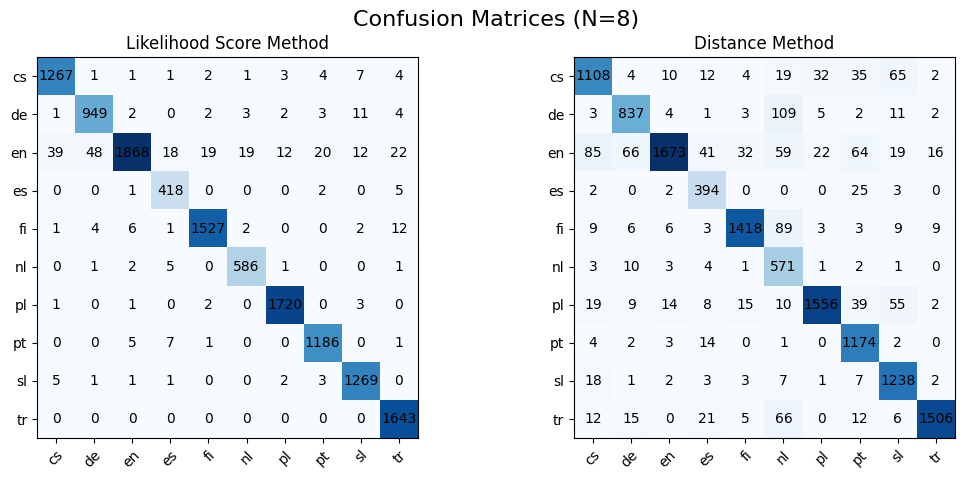

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

im1 = axs[0].imshow(confusion_matrix_likelihood, cmap='Blues')
axs[0].set_title('Likelihood Score Method')
axs[0].set_xticks(np.arange(len(labels)))
axs[0].set_yticks(np.arange(len(labels)))
axs[0].set_xticklabels(labels)
axs[0].set_yticklabels(labels)
plt.setp(axs[0].get_xticklabels(),
        rotation=45, 
        ha="right",
         rotation_mode="anchor")


for i in range(len(labels)):
    for j in range(len(labels)):
        text = axs[0].text(j, i, confusion_matrix_likelihood[i][j],
                           ha="center", va="center", color="black")



im2 = axs[1].imshow(confusion_matrix_distance, cmap='Blues')
axs[1].set_title('Distance Method')
axs[1].set_xticks(np.arange(len(labels)))
axs[1].set_yticks(np.arange(len(labels)))
axs[1].set_xticklabels(labels)
axs[1].set_yticklabels(labels)
plt.setp(axs[1].get_xticklabels(), 
         rotation=45, 
         ha="right",
         rotation_mode="anchor")


for i in range(len(labels)):
    for j in range(len(labels)):
        text = axs[1].text(j, i, confusion_matrix_distance[i][j],
                           ha="center", va="center", color="black")


plt.subplots_adjust(wspace=-0.5) 
plt.suptitle('Confusion Matrices (N=3)', fontsize=16, y=0.95)

plt.tight_layout()
plt.show()

In [92]:
def calculate_metrics(confusion_matrix):
    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
    print("Accuracy:", accuracy)

    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    print("Recall (Sensitivity) for each class:\n", recall)

    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    print("Precision for each class:\n", precision)

print("Metrics for confusion_matrix_likelihood:")
calculate_metrics(confusion_matrix_likelihood)
print()
print("Metrics for confusion_matrix_distance:")
calculate_metrics(confusion_matrix_distance)

Metrics for confusion_matrix_likelihood:
Accuracy: 0.9733051510881477
Recall (Sensitivity) for each class:
 [0.98140976 0.97134084 0.8993741  0.98122066 0.98199357 0.98322148
 0.99594673 0.98833333 0.98985959 1.        ]
Precision for each class:
 [0.96423135 0.94521912 0.98993111 0.92682927 0.98325821 0.95908347
 0.98850575 0.97372742 0.97315951 0.97104019]

Metrics for confusion_matrix_distance:
Accuracy: 0.898309065288868
Recall (Sensitivity) for each class:
 [0.85824942 0.8567042  0.80548869 0.92488263 0.91189711 0.95805369
 0.90098437 0.97833333 0.96567863 0.91661595]
Precision for each class:
 [0.87727633 0.88105263 0.97437391 0.78642715 0.95746117 0.61331901
 0.96049383 0.86133529 0.87863733 0.9785575 ]
